## Elevation Profile Plot from a GPS Track

In [102]:
import pandas as pd
import geopandas as gpd
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [103]:
data_pkg_path = 'data'
gpx_path = os.path.join(data_pkg_path, 'gps', 'summit.gpx')
# GPX files contain many layers. Read the 'track_points' layer
gdf = gpd.read_file(gpx_path, layer='track_points')
gdf = gdf[['track_fid','ele', 'time', 'geometry']]
gdf

,track_fid,ele,time,geometry
0,0,3187.3,2022-04-04T00:07:42+00:00,POINT (78.56758 30.82669)
1,0,3194.4,2022-04-04T00:07:54+00:00,POINT (78.56747 30.82667)
2,0,3196.6,2022-04-04T00:07:59+00:00,POINT (78.56743 30.82670)
3,0,3196.8,2022-04-04T00:08:04+00:00,POINT (78.56741 30.82671)
4,0,3198.2,2022-04-04T00:08:14+00:00,POINT (78.56739 30.82668)
...,...,...,...,...
2305,0,3150.8,2022-04-04T06:05:58+00:00,POINT (78.56878 30.82703)
2306,0,3150.5,2022-04-04T06:06:01+00:00,POINT (78.56879 30.82704)
2307,0,3150.3,2022-04-04T06:06:06+00:00,POINT (78.56883 30.82707)
2308,0,3150.3,2022-04-04T06:06:11+00:00,POINT (78.56878 30.82710)


Let's use the timestamp contained in the 'time' column as the index. This will allow us to filter and plot the time-series data easily. We must first convert the time column to datetime type with an appropriate timezone.

In [104]:
gdf['time'] = pd.to_datetime(gdf['time'])
gdf = gdf.set_index('time')
gdf.index = gdf.index.tz_convert('Asia/Kolkata')
gdf

,track_fid,ele,geometry
time,,,
2022-04-04 05:37:42+05:30,0,3187.3,POINT (78.56758 30.82669)
2022-04-04 05:37:54+05:30,0,3194.4,POINT (78.56747 30.82667)
2022-04-04 05:37:59+05:30,0,3196.6,POINT (78.56743 30.82670)
2022-04-04 05:38:04+05:30,0,3196.8,POINT (78.56741 30.82671)
2022-04-04 05:38:14+05:30,0,3198.2,POINT (78.56739 30.82668)
...,...,...,...
2022-04-04 11:35:58+05:30,0,3150.8,POINT (78.56878 30.82703)
2022-04-04 11:36:01+05:30,0,3150.5,POINT (78.56879 30.82704)
2022-04-04 11:36:06+05:30,0,3150.3,POINT (78.56883 30.82707)


Using time as index allows us to filter the data as follows

In [105]:
gdf_subset = gdf['2022-04-04T09:00:00':'2022-04-04T09:30:00']
gdf_subset

,track_fid,ele,geometry
time,,,
2022-04-04 09:08:44+05:30,0,3626.1,POINT (78.54941 30.83630)
2022-04-04 09:10:01+05:30,0,3625.7,POINT (78.54940 30.83636)
2022-04-04 09:10:06+05:30,0,3625.7,POINT (78.54940 30.83636)
2022-04-04 09:11:25+05:30,0,3626.4,POINT (78.54939 30.83628)
2022-04-04 09:11:30+05:30,0,3626.4,POINT (78.54940 30.83629)
...,...,...,...
2022-04-04 09:29:38+05:30,0,3539.5,POINT (78.55257 30.83533)
2022-04-04 09:29:41+05:30,0,3539.9,POINT (78.55259 30.83532)
2022-04-04 09:29:46+05:30,0,3539.1,POINT (78.55261 30.83530)


We can now plot the elevation against the timestamp using Matplotlib. Since we have a large number of timestamps, we can use `set_major_locator()` to define what labels will be present on the axis.

Since our timestamps are timezone aware, we can also plot a timezone name (i.e. IST) along with the label.

We can also use a different style for our plot. You can run `plt.style.available` to see all available styles.

In [106]:
plt.style.use('ggplot')

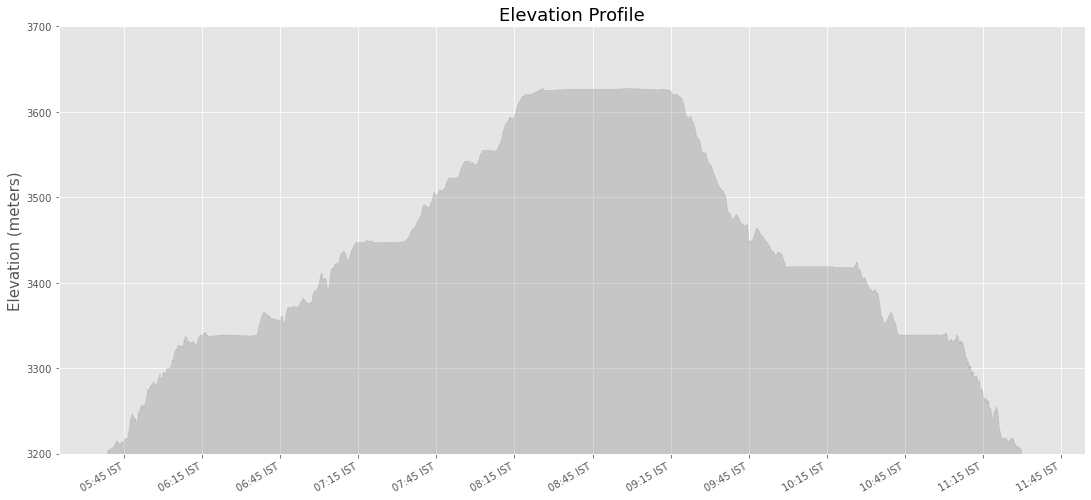

In [107]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
gdf['ele'].plot(kind='line', ax=ax, color='none',alpha=0.3)
plt.tight_layout()
plt.title('Elevation Profile', fontsize = 18)
plt.ylabel('Elevation (meters)', size = 15)
plt.xlabel(None)
# Show a tick every 30 minute
xlocator = mdates.MinuteLocator(interval=30)

xformat = mdates.DateFormatter('%H:%M %Z', tz=gdf.index.tz)  # adds some extra formatting, but not required

ax.xaxis.set_major_locator(xlocator)
ax.xaxis.set_major_formatter(xformat)
ax.set_ylim([3200, 3700])
ax.fill_between(gdf.index, gdf['ele'].values, color='grey', alpha=0.3)
plt.show()

In [108]:
plt.style.use('default')